# Descriptive Analysis

When trying to understand your data, it is typically impossible to just look at raw data and get much insight. We need ways to turn a bunch of data into a smaller set of numbers that are easily digestible summaries of your data. This will make them understandable both for you and for the people you work with. We call these **descriptive statistics**.

## Objectives

- Use business context to guide exploratory analyses
- Pose clear business-relevant questions and answer them with data
- Identify limitations of data for solving business problems

In [1]:
# Imports!
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
# We'll start with chipotle data
# Be sure to set `sep='\t' since it's a tsv, not csv
chipotle = pd.read_csv('data/chipotle.tsv',sep = '\t')

In [4]:
# Check it out
chipotle.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [25]:
chipotle.loc[chipotle['item_name'] == 'Chicken Bowl']

,order_id,quantity,item_name,choice_description,item_price
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
13,7,1,Chicken Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",$11.25
19,10,1,Chicken Bowl,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$8.75
26,13,1,Chicken Bowl,"[Roasted Chili Corn Salsa (Medium), [Pinto Bea...",$8.49
...,...,...,...,...,...
4590,1825,1,Chicken Bowl,"[Roasted Chili Corn Salsa, [Rice, Black Beans,...",$11.25
4591,1825,1,Chicken Bowl,"[Tomatillo Red Chili Salsa, [Rice, Black Beans...",$8.75
4595,1826,1,Chicken Bowl,"[Tomatillo Green Chili Salsa, [Rice, Black Bea...",$8.75
4599,1827,1,Chicken Bowl,"[Roasted Chili Corn Salsa, [Cheese, Lettuce]]",$8.75


In [5]:
chipotle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB


In [8]:
# Those item prices are gross - let's write a lambda function to clean that column!
# Capture the column in a new variable, item_prices
item_prices = chipotle['item_price'].apply(lambda x: float(x.replace('$','')))

In [9]:
# Check it
item_prices

0        2.39
1        3.39
2        3.39
3        2.39
4       16.98
        ...  
4617    11.75
4618    11.75
4619    11.25
4620     8.75
4621     8.75
Name: item_price, Length: 4622, dtype: float64

# Different Statistical Measures

## Measures of Center

One natural place to begin is to ask about where the **middle** of the data is. In other words, what is the value that is closest to our other values? 

There are three common measures used to describe the "middle":

- **Mean**: The sum of values / number of values
- **Median**: The value with as many values above it as below it
    - If the dataset has an even number of values, the median is the mean of the two middle numbers.
- **Mode**: The most frequent value(s)
    - A dataset can have multiple modes if multiple values are tied for the most frequent.

Let's see what we have for our example:

In [10]:
print(f"Mean: {item_prices.mean()}")
print("*"*20)
print(f"Median: {item_prices.median()}")
print("*"*20)
print(f"Mode: {item_prices.mode()}")

Mean: 7.464335785374297
********************
Median: 8.75
********************
Mode: 0    8.75
dtype: float64


**Discussion**: If somebody asked you "How expensive are items at chipotle?", how would you answer?

- 


## Measures of Spread

Another natural question is about the **spread** of the data. In other words, how wide a range of values do you have? And how close or far are they from the "middle"?

### Min, Max, and Range

The minimum and maximum values of a dataset tell you the full extent of the values of your dataset. The range of the dataset is the difference between those two values.

In [11]:
print(f"Min: {item_prices.min()}")
print(f"Max: {item_prices.max()}")
print(f"Range: {item_prices.max() - item_prices.min()}")

Min: 1.09
Max: 44.25
Range: 43.16


### Percentiles and IQR

You can also calculate values at various **percentiles** to understand the spread. An "Nth Percentile" value is the value that is greater than N% of other values. The 25th and 75th percentiles are commonly used to describe spread, and the **interquartile range (IQR)** is the difference between these two values.

See [the docs](https://numpy.org/doc/stable/reference/generated/numpy.percentile.html) for more specifics about how percentiles are calculated, which is surprisingly tricky.

In [12]:
print(f"25th Percentile: {np.percentile(item_prices, 25)}")
print(f"75th Percentile: {np.percentile(item_prices, 75)}")
print(f"IQR: {np.percentile(item_prices, 75) - np.percentile(item_prices, 25)}")

25th Percentile: 3.39
75th Percentile: 9.25
IQR: 5.859999999999999


### Standard Deviation

The **standard deviation** is in effect the distance from the mean of the "average" data point. It is defined as: $$\sqrt\frac{\Sigma(x_i - \bar{x})^2}{n}$$

In [13]:
print(f"Standard Deviation: {item_prices.std()}")

Standard Deviation: 4.245557197940302


In [14]:
np.std(item_prices)#, ddof=1)

4.245097896029731

In [15]:
item_prices.describe()

count    4622.000000
mean        7.464336
std         4.245557
min         1.090000
25%         3.390000
50%         8.750000
75%         9.250000
max        44.250000
Name: item_price, dtype: float64

# Visual Description

A picture is worth a thousand words - or numbers! Here we will show how to use histograms and box-and-whisker plots to describe your data.

## Histograms

One natural way of starting to understand a dataset is to construct a **histogram**, which is a bar chart showing the counts of the different values in the dataset.

There will usually be many distinct values in your dataset, and you will need to decide how many **bins** to use in the histogram. The bins define the ranges of values captured in each bar in your chart. 

Text(0.5, 1.0, 'Counts, 14 Bins')

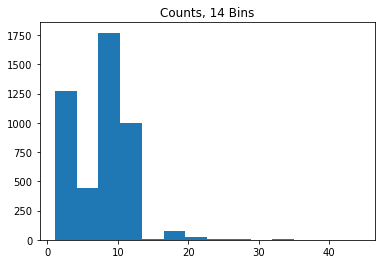

In [16]:
fig, ax = plt.subplots()
ax.hist(item_prices, bins=14)
plt.title('Counts, 14 Bins')

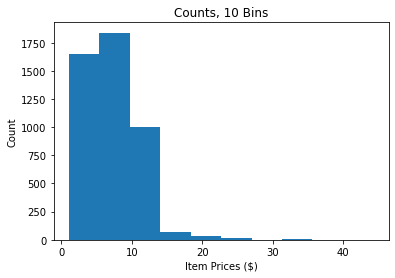

In [22]:
fig, ax = plt.subplots()
ax.hist(item_prices, bins=10)
ax.set_title('Counts, 10 Bins')
ax.set_ylabel('Count')
ax.set_xlabel('Item Prices ($)');

Text(0.5, 1.0, 'Counts, 5 Bins')

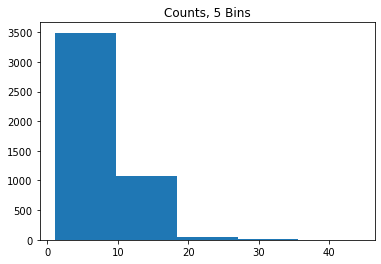

In [18]:
fig, ax = plt.subplots()
ax.hist(item_prices, bins=5)
plt.title('Counts, 5 Bins')

Text(0.5, 1.0, 'Counts, 2 Bins')

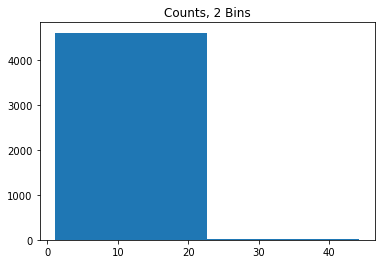

In [19]:
fig, ax = plt.subplots()
ax.hist(item_prices, bins=2)
plt.title('Counts, 2 Bins')

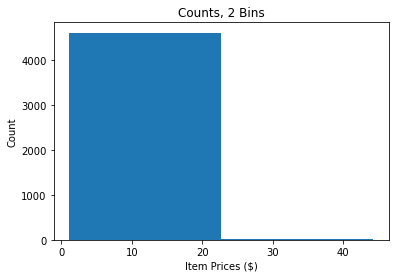

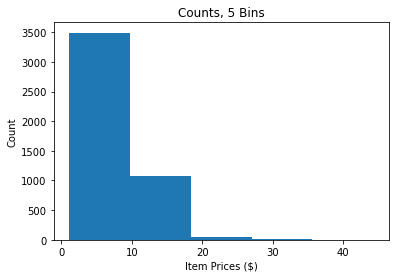

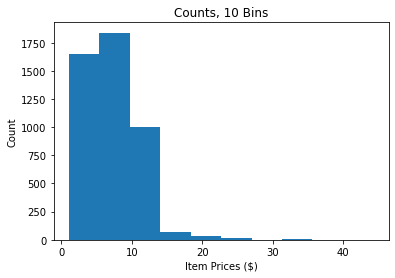

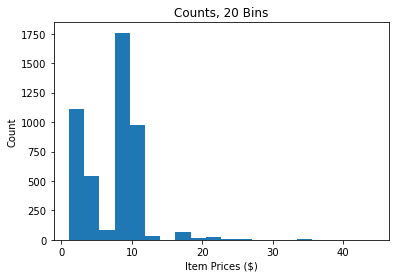

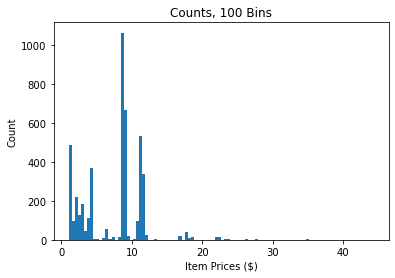

In [23]:
for bin_num in [2,5,10,20,100]:  
    fig, ax = plt.subplots()
    ax.hist(item_prices, bins=bin_num)
    ax.set_title(f'Counts, {bin_num} Bins')
    ax.set_ylabel('Count')
    ax.set_xlabel('Item Prices ($)')
    plt.show()

## Box and Whisker Plot

A box-and-whisker plot can also be useful for visually summarizing your data by showing the min, IQR, and max.

Text(0.5, 1.0, 'Counts of Pairs of Shoes')

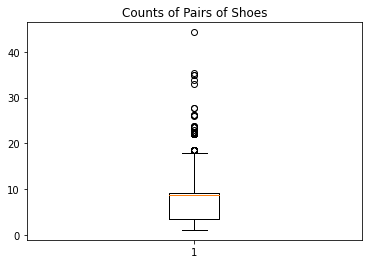

In [24]:
fig, ax = plt.subplots()
ax.boxplot(item_prices)
plt.title('Counts of Pairs of Shoes')

<AxesSubplot:xlabel='item_price'>

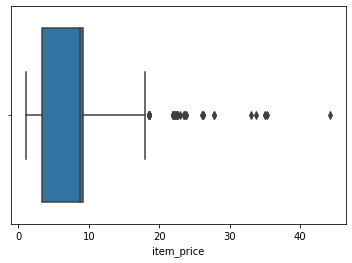

In [27]:
sns.boxplot(x = item_prices)

# Addressing Business Questions

## Fast Food Data

In [28]:
ffood = pd.read_csv('data/Datafiniti_Fast_Food.csv')

In [29]:
ffood.head()

,id,dateAdded,dateUpdated,address,categories,city,country,keys,latitude,longitude,name,postalCode,province,sourceURLs,websites
0,AVwcmSyZIN2L1WUfmxyw,2015-10-19T23:47:58Z,2018-06-26T03:00:14Z,800 N Canal Blvd,American Restaurant and Fast Food Restaurant,Thibodaux,US,us/la/thibodaux/800ncanalblvd/1780593795,29.814697,-90.814742,SONIC Drive In,70301,LA,https://foursquare.com/v/sonic-drive-in/4b7361...,https://locations.sonicdrivein.com/la/thibodau...
1,AVwcmSyZIN2L1WUfmxyw,2015-10-19T23:47:58Z,2018-06-26T03:00:14Z,800 N Canal Blvd,Fast Food Restaurants,Thibodaux,US,us/la/thibodaux/800ncanalblvd/1780593795,29.814697,-90.814742,SONIC Drive In,70301,LA,https://foursquare.com/v/sonic-drive-in/4b7361...,https://locations.sonicdrivein.com/la/thibodau...
2,AVwcopQoByjofQCxgfVa,2016-03-29T05:06:36Z,2018-06-26T02:59:52Z,206 Wears Valley Rd,Fast Food Restaurant,Pigeon Forge,US,us/tn/pigeonforge/206wearsvalleyrd/-864103396,35.803788,-83.580553,Taco Bell,37863,TN,https://www.yellowpages.com/pigeon-forge-tn/mi...,"http://www.tacobell.com,https://locations.taco..."
3,AVweXN5RByjofQCxxilK,2017-01-03T07:46:11Z,2018-06-26T02:59:51Z,3652 Parkway,Fast Food,Pigeon Forge,US,us/tn/pigeonforge/3652parkway/93075755,35.782339,-83.551408,Arby's,37863,TN,http://www.yellowbook.com/profile/arbys_163389...,"http://www.arbys.com,https://locations.arbys.c..."
4,AWQ6MUvo3-Khe5l_j3SG,2018-06-26T02:59:43Z,2018-06-26T02:59:43Z,2118 Mt Zion Parkway,Fast Food Restaurant,Morrow,US,us/ga/morrow/2118mtzionparkway/1305117222,33.562738,-84.321143,Steak 'n Shake,30260,GA,https://foursquare.com/v/steak-n-shake/4bcf77a...,http://www.steaknshake.com/locations/23851-ste...


In [30]:
ffood.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           10000 non-null  object 
 1   dateAdded    10000 non-null  object 
 2   dateUpdated  10000 non-null  object 
 3   address      10000 non-null  object 
 4   categories   10000 non-null  object 
 5   city         10000 non-null  object 
 6   country      10000 non-null  object 
 7   keys         10000 non-null  object 
 8   latitude     10000 non-null  float64
 9   longitude    10000 non-null  float64
 10  name         10000 non-null  object 
 11  postalCode   10000 non-null  object 
 12  province     10000 non-null  object 
 13  sourceURLs   10000 non-null  object 
 14  websites     10000 non-null  object 
dtypes: float64(2), object(13)
memory usage: 1.1+ MB


### Question 1

How many different restaurant chains are represented in the data? Visualize the numbers for the restaurants with 50 or more instances.

In [35]:
# Your code here
ffood['name'] = ffood['name'].str.replace('-',' ')

In [38]:
ffood['name'] = ffood['name'].str.split('/')

In [41]:
ffood = ffood.explode(column = 'name')

In [42]:
ffood.head()

,id,dateAdded,dateUpdated,address,categories,city,country,keys,latitude,longitude,name,postalCode,province,sourceURLs,websites
0,AVwcmSyZIN2L1WUfmxyw,2015-10-19T23:47:58Z,2018-06-26T03:00:14Z,800 N Canal Blvd,American Restaurant and Fast Food Restaurant,Thibodaux,US,us/la/thibodaux/800ncanalblvd/1780593795,29.814697,-90.814742,SONIC Drive In,70301,LA,https://foursquare.com/v/sonic-drive-in/4b7361...,https://locations.sonicdrivein.com/la/thibodau...
1,AVwcmSyZIN2L1WUfmxyw,2015-10-19T23:47:58Z,2018-06-26T03:00:14Z,800 N Canal Blvd,Fast Food Restaurants,Thibodaux,US,us/la/thibodaux/800ncanalblvd/1780593795,29.814697,-90.814742,SONIC Drive In,70301,LA,https://foursquare.com/v/sonic-drive-in/4b7361...,https://locations.sonicdrivein.com/la/thibodau...
2,AVwcopQoByjofQCxgfVa,2016-03-29T05:06:36Z,2018-06-26T02:59:52Z,206 Wears Valley Rd,Fast Food Restaurant,Pigeon Forge,US,us/tn/pigeonforge/206wearsvalleyrd/-864103396,35.803788,-83.580553,Taco Bell,37863,TN,https://www.yellowpages.com/pigeon-forge-tn/mi...,"http://www.tacobell.com,https://locations.taco..."
3,AVweXN5RByjofQCxxilK,2017-01-03T07:46:11Z,2018-06-26T02:59:51Z,3652 Parkway,Fast Food,Pigeon Forge,US,us/tn/pigeonforge/3652parkway/93075755,35.782339,-83.551408,Arby's,37863,TN,http://www.yellowbook.com/profile/arbys_163389...,"http://www.arbys.com,https://locations.arbys.c..."
4,AWQ6MUvo3-Khe5l_j3SG,2018-06-26T02:59:43Z,2018-06-26T02:59:43Z,2118 Mt Zion Parkway,Fast Food Restaurant,Morrow,US,us/ga/morrow/2118mtzionparkway/1305117222,33.562738,-84.321143,Steak 'n Shake,30260,GA,https://foursquare.com/v/steak-n-shake/4bcf77a...,http://www.steaknshake.com/locations/23851-ste...


In [44]:
# How many unique chains?
len(ffood['name'].unique())

569

In [47]:
#ffood.groupby('name').count()

In [60]:
chain_values = ffood['name'].value_counts()

In [63]:
chain_50 = chain_values.loc[chain_values > 50]

chain_50.values

array([1898, 1035,  834,  776,  663,  628,  330,  231,  218,  215,  206,
        166,  131,  119,  112,  100,   82,   76,   71,   71,   66,   61,
         57,   54,   54,   53,   52])

In [64]:
chain_50.index

Index(['McDonald's', 'Taco Bell', 'Burger King', 'Subway', 'Arby's', 'Wendy's',
       'Jack in the Box', 'Pizza Hut', 'Dairy Queen', 'Domino's Pizza',
       'Chick fil A', 'KFC', 'SONIC Drive In', 'Jimmy John's', 'Carl's Jr.',
       'Hardee's', 'Krystal', 'Panera Bread', 'Dunkin' Donuts', 'Culver's',
       'Del Taco', 'Panda Express', 'SUBWAY', 'In N Out Burger',
       'Steak 'n Shake', 'Taco John's', 'Sonic Drive In'],
      dtype='object')

<BarContainer object of 27 artists>

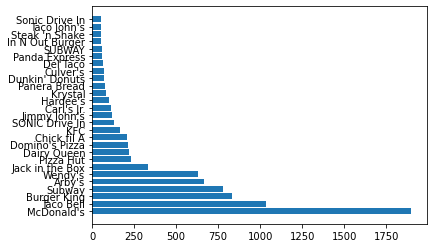

In [67]:
fig, ax = plt.subplots()

ax.barh(y = chain_50.index, width = chain_50.values)
#plt.xticks(rotation = 90);

### Question 2

Visualize the locations of restaurants in Buffalo, NY.

In [68]:
# Your code here
ffood.head()

,id,dateAdded,dateUpdated,address,categories,city,country,keys,latitude,longitude,name,postalCode,province,sourceURLs,websites
0,AVwcmSyZIN2L1WUfmxyw,2015-10-19T23:47:58Z,2018-06-26T03:00:14Z,800 N Canal Blvd,American Restaurant and Fast Food Restaurant,Thibodaux,US,us/la/thibodaux/800ncanalblvd/1780593795,29.814697,-90.814742,SONIC Drive In,70301,LA,https://foursquare.com/v/sonic-drive-in/4b7361...,https://locations.sonicdrivein.com/la/thibodau...
1,AVwcmSyZIN2L1WUfmxyw,2015-10-19T23:47:58Z,2018-06-26T03:00:14Z,800 N Canal Blvd,Fast Food Restaurants,Thibodaux,US,us/la/thibodaux/800ncanalblvd/1780593795,29.814697,-90.814742,SONIC Drive In,70301,LA,https://foursquare.com/v/sonic-drive-in/4b7361...,https://locations.sonicdrivein.com/la/thibodau...
2,AVwcopQoByjofQCxgfVa,2016-03-29T05:06:36Z,2018-06-26T02:59:52Z,206 Wears Valley Rd,Fast Food Restaurant,Pigeon Forge,US,us/tn/pigeonforge/206wearsvalleyrd/-864103396,35.803788,-83.580553,Taco Bell,37863,TN,https://www.yellowpages.com/pigeon-forge-tn/mi...,"http://www.tacobell.com,https://locations.taco..."
3,AVweXN5RByjofQCxxilK,2017-01-03T07:46:11Z,2018-06-26T02:59:51Z,3652 Parkway,Fast Food,Pigeon Forge,US,us/tn/pigeonforge/3652parkway/93075755,35.782339,-83.551408,Arby's,37863,TN,http://www.yellowbook.com/profile/arbys_163389...,"http://www.arbys.com,https://locations.arbys.c..."
4,AWQ6MUvo3-Khe5l_j3SG,2018-06-26T02:59:43Z,2018-06-26T02:59:43Z,2118 Mt Zion Parkway,Fast Food Restaurant,Morrow,US,us/ga/morrow/2118mtzionparkway/1305117222,33.562738,-84.321143,Steak 'n Shake,30260,GA,https://foursquare.com/v/steak-n-shake/4bcf77a...,http://www.steaknshake.com/locations/23851-ste...


In [70]:
buffalo = ffood.loc[ffood['city'] == 'Buffalo']

In [71]:
buffalo

,id,dateAdded,dateUpdated,address,categories,city,country,keys,latitude,longitude,name,postalCode,province,sourceURLs,websites
35,AVzA-ZBX3D1zeR_xBC5-,2017-06-19T15:29:59Z,2018-06-25T09:29:40Z,1028 Mckinley Pkwy,Fast Food Restaurants,Buffalo,US,us/ny/buffalo/1028mckinleypkwy/-1161002137,42.857899,-78.825089,McDonald's,14220,NY,https://foursquare.com/v/mcdonalds/4bde2ddce75...,http://www.mcdonalds.com/?cid=RF:YXT_FM:TP::Ye...
2005,AVzA-Y9oFcQ3k02bBaXi,2017-06-19T15:29:59Z,2018-06-17T23:19:47Z,3120 Niagara Falls Blvd,Fast Food Restaurant,Buffalo,US,us/ny/buffalo/3120niagarafallsblvd/-1161002137,43.039404,-78.824138,McDonald's,14228,NY,https://www.allmenus.com/ny/buffalo/189056-mcd...,http://mcdonalds.com
2010,AVwcllbnkufWRAb5w06u,2015-10-20T00:55:54Z,2018-06-17T23:19:43Z,262 Grider St,Fast Food,Buffalo,US,us/ny/buffalo/262griderst/-1161002137,42.921505,-78.829117,McDonald's,14215,NY,https://www.allmenus.com/ny/buffalo/189021-mcd...,http://www.mcdonalds.com/?cid=RF:YXT_FM:TP::Ye...
2015,AVwdiyrbIN2L1WUfw2ls,2015-10-23T02:54:10Z,2018-06-17T23:19:40Z,241 W Ferry St,Fast Food Restaurant,Buffalo,US,us/ny/buffalo/241wferryst/-1161002137,42.915230,-78.892305,McDonald's,14213,NY,https://www.allmenus.com/ny/buffalo/188996-mcd...,http://www.mcdonalds.com/?cid=RF:YXT_FM:TP::Ye...
2016,AVwdiyrbIN2L1WUfw2ls,2015-10-23T02:54:10Z,2018-06-17T23:19:40Z,241 W Ferry St,Fast Food,Buffalo,US,us/ny/buffalo/241wferryst/-1161002137,42.915230,-78.892305,McDonald's,14213,NY,https://www.allmenus.com/ny/buffalo/188996-mcd...,http://www.mcdonalds.com/?cid=RF:YXT_FM:TP::Ye...
2020,AVwdZFLzIN2L1WUfvVZr,2015-10-23T23:36:09Z,2018-06-17T23:19:35Z,2058 Elmwood Ave,Fast Food Restaurant Military,Buffalo,US,us/ny/buffalo/2058elmwoodave/-1161002137,42.953142,-78.878979,McDonald's,14207,NY,http://www.citysearch.com/profile/42391736/buf...,"http://mcdonalds.com,http://www.mcdonalds.com/..."
2118,AVwcoEmiIN2L1WUfnF4w,2016-03-27T05:34:26Z,2018-06-17T23:16:35Z,1338 Main St,Fast Food Restaurant,Buffalo,US,us/ny/buffalo/1338mainst/-1161002137,42.910180,-78.867002,McDonald's,14209,NY,https://www.yellowpages.com/buffalo-ny/mip/mcd...,"http://mcdonalds.com,http://www.mcdonalds.com/..."
3382,AVzA-Y7L3D1zeR_xBC5z,2017-06-19T15:29:59Z,2018-06-05T13:09:06Z,3336 Sheridan Dr,Fast Food Restaurants,Buffalo,US,us/ny/buffalo/3336sheridandr/867927397,42.980127,-78.810087,Jim's Steakout,14226,NY,https://foursquare.com/v/jims-steakout/4bd0b3e...,http://www.jimssteakout.com
4747,AVzYzhih-gnIPe8DTY1h,2017-06-24T06:33:24Z,2018-05-31T14:30:44Z,3563 Sheridan Dr,Fast Food Restaurants,Buffalo,US,us/ny/buffalo/3563sheridandr/-1055723171,42.979400,-78.801300,Domino's Pizza,14226,NY,http://www.citysearch.com/profile/7753607/buff...,https://www.dominos.com/en/?redirect=homepagea...
5474,AVwdXPNJkufWRAb55Hy3,2015-09-28T22:15:33Z,2018-05-29T10:15:17Z,3513 Mckinley Pkwy,Fast Food Restaurant,Buffalo,US,us/ny/buffalo/3513mckinleypkwy/-791445730,42.789407,-78.809774,Wendy's,14219,NY,http://www.allmenus.com/ny/hamburg/181932-wend...,"http://wendys.com,http://www.wendys.com"


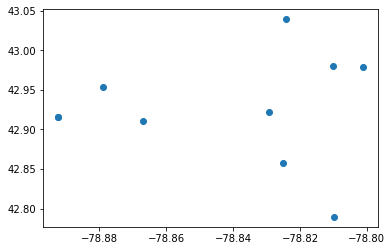

In [72]:
fig, ax = plt.subplots()

ax.scatter(x = buffalo['longitude'], y = buffalo['latitude'])

### Your Turn:

Work on questions 3-5 below in small groups:

### Question 3

In this dataset, how many Taco Bell restaurants are there in Alaska, and in which cities are they?

In [78]:
# Your code here
ffood.loc[(ffood['name'] == 'Taco Bell') & (ffood['province'] == 'AK')]

,id,dateAdded,dateUpdated,address,categories,city,country,keys,latitude,longitude,name,postalCode,province,sourceURLs,websites
8497,AVwc9pgFIN2L1WUfqyrq,2015-12-17T19:04:28Z,2018-04-30T09:35:14Z,1453 University Ave S,Fast Food,Fairbanks,US,us/ak/fairbanks/1453universityaves/-864103396,64.835505,-147.81325,Taco Bell,99709,AK,http://www.citysearch.com/profile/1335940/fair...,"http://www.tacobell.com,https://locations.taco..."
8498,AVwc9pgFIN2L1WUfqyrq,2015-12-17T19:04:28Z,2018-04-30T09:35:14Z,1453 University Ave S,Fast Food Restaurant,Fairbanks,US,us/ak/fairbanks/1453universityaves/-864103396,64.835505,-147.81325,Taco Bell,99709,AK,http://www.citysearch.com/profile/1335940/fair...,"http://www.tacobell.com,https://locations.taco..."
9789,AVzA-GFMFcQ3k02bBaLW,2017-06-19T15:28:42Z,2018-04-10T06:49:29Z,9001 Jewel Lake Rd Ste 12,Fast Food Restaurant,Anchorage,US,us/ak/anchorage/9001jewellakerdste12/-864103396,61.138300,-149.95040,Taco Bell,99502,AK,https://foursquare.com/v/taco-bell/4bc23f7af82...,"http://www.tacobell.com,https://locations.taco..."


In [93]:
ffood.loc[(ffood['name'] == 'Taco Bell') & (ffood['province'] == 'AK')]['city'].unique

<bound method Series.unique of 8497    Fairbanks
8498    Fairbanks
9789    Anchorage
Name: city, dtype: object>

### Question 4

Convert the ZIP Codes to (five-digit) integers.

In [96]:
# Your code here


ffood['postalCode'] = ffood['postalCode'].apply(lambda x: int(x[:5]))
#dont have to be lambda

In [95]:
#another way
#ffood['postalCode'].str.split('-').str[0].astype(int)

0       70301
1       70301
2       37863
3       37863
4       30260
        ...  
9995    27106
9996    27107
9997    27284
9998    27893
9999    28337
Name: postalCode, Length: 10018, dtype: int64

### Question 5

Which restaurant chain has the greatest representation in San Francisco, CA? (This city covers all the ZIP Codes between 94100 and 94188, inclusive)

In [99]:
# Your code here
sf = ffood.loc[(ffood['postalCode'] >= 94100) & (ffood['postalCode'] <= 94188)]

In [101]:
sf['name'].value_counts()

Subway                     5
Burger King                2
McDonald's                 1
Domino's Pizza             1
Chipotle Mexican Grill     1
Pollo Campero              1
VeganBurg                  1
Taqueria                   1
Panda Express              1
De Afghanan Kabob House    1
Batter Up                  1
Name: name, dtype: int64

## Credit Card Data

In [ ]:
credit = pd.read_csv('data/BankChurners.csv',
                     # Using a lambda function to ignore two unnecessary columns
                     usecols=lambda x: "Naive_Bayes" not in x)

In [ ]:
credit.head()

In [ ]:
credit.describe()

In [ ]:
credit['Attrition_Flag'].value_counts()

We work for a credit card company and are worried about customers churning (becoming attrited).

### Your Turn: Second Exercise!

In breakout rooms, work on questions 1-3 below:

### Question 1

Get the means of the numerical columns for the existing and the attrited customers separately.

In [ ]:
# Your code here

### Question 2

Visualize the distributions of total revolving balances for each group.

In [ ]:
# Your code here

### Question 3

Make two bar charts counting the numbers in each income category for each group separately.

In [ ]:
# Your code here